<a href="https://colab.research.google.com/github/leebio/bio/blob/main/Final_Project%5B%EC%9D%B4%EB%B9%84%EC%98%A4%5D5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project_이비오

# Dataset Describtion

URL: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

이 데이터세트에는 학력, 경력, 지역, 고용 관련 요소 등 회사 직원에 대한 정보 포함

* 개인 정보를 보호하는 동시에 인력에 대한 귀중한 통찰력을 제공하기 위해 익명으로 처리되었음

This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy while still providing valuable insights into the workforce.

### Task:

[이전 분석]
- 2가지 모형으로 분석하여 직원 이탈(퇴사)에 대한 예측
1. LogisticRegression -> 71.2%
2. DecisionTreeClassifier -> 88.6%

DecisionTreeClassifier 모형 초이스 ->
   Test data 결과 -> 86.0% 의 정확도를 나타냄



[나의 임무]
- 다양한 모형 및 분석방법을 활용하여 86.0% 보다 정확도를 높이는 것


### Datasets

4,653행 X 9열로 데이터 구성

1. Education: The educational qualifications of employees, including degree, institution, and field of study.
   
   - 교육 수준 (3종류): Bachelors(학사), Masters(석사), PHD(박사)


2. Joining Year: The year each employee joined the company, indicating their length of service.

  - 입사년도 (7종류) : 2012, 2013, 2014, 2015, 2016, 2017, 2018
  
  - 12년도부터 ~ 18년도까지 7종류의 데이터로 구성


3. City: The location or city where each employee is based or works.

  - 직원이 거주하거나 근무하는 도시

  - 도시 (3종류) : Bangalore, Pune, New Delhi (인도)

4. Payment Tier: Categorization of employees into different salary tiers.

  - 직원의 급여 계층(3종류) : 1, 2, 3

5. Age: The age of each employee, providing demographic insights.

   - 직원의 연령 : 21 ~ 41 까지의 숫자로 표기

6. Gender: Gender identity of employees, promoting diversity analysis.

   - 성별 (2종류) : Male, Female

7. Ever Benched: Indicates if an employee has ever been temporarily without assigned work.

   - 할당된 작업 없이 일시적으로 머물렸는지 여부(2종류) : Yes, No
   

8. Experience in Current Domain: The number of years of experience employees have in their current field.

  - 경력 연수(8종류) : 0 ~ 7

9. Leave or Not: a target column

  - 퇴사 여부(2종류) : 0, 1
    
    
* Train dataset: 80% data
* Test dataset:  20% data



Features(x): 1-8열

1.교육, 2.입사년도, 3.도시, 4.임금 티어,

5.연령, 6.성별, 7.Ever Benched, 8.경력연수



Target(y): 9열

9.직원의 퇴사 여부

# Model Buliding

In [1]:
# 필요한 library 불러오기
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import hinge_loss
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
employee_data = pd.read_csv("Employee.csv")

# 1. Data Preprocessing

# 1.1 Basic Data Analysis

In [3]:
employee_data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
employee_data.shape

(4653, 9)

In [5]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
employee_data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [7]:
employee_data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# 1.2 Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

각 범주형 열에 레이블 인코딩을 적용

레이블 인코딩은 범주형 데이터 -> 카테고리에 고유한 정수 값을 할당수치 표현

In [9]:
categorical_columns = ['Gender', 'EverBenched', 'Education', 'City']
#Apply label encoding to each categorical column
for column in categorical_columns:
    employee_data[column] = label_encoder.fit_transform(employee_data[column])
employee_data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


# 1.3 Define Features and the Target Variable

In [10]:
X = employee_data.drop('LeaveOrNot',axis = 1)
y = employee_data['LeaveOrNot']

# 1.4 Data visualization

Text(0, 0.5, 'Count')

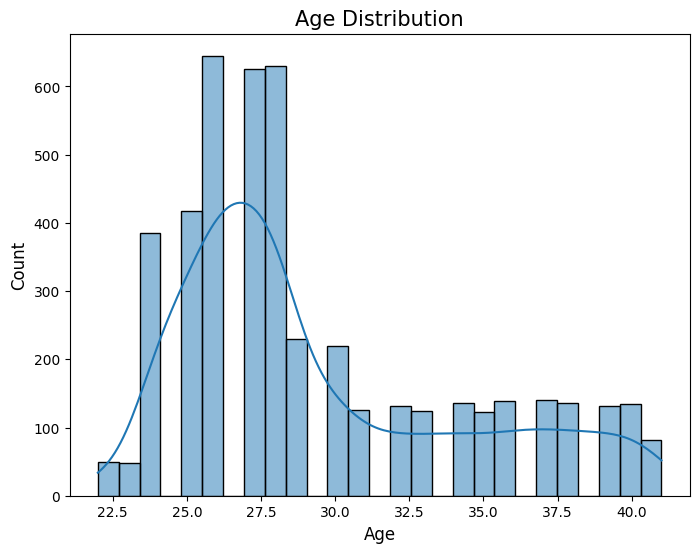

In [11]:
plt.figure(figsize=(8,6))

sns.histplot(employee_data['Age'],kde = True)

plt.title("Age Distribution", fontsize = 15)
plt.xlabel("Age",fontsize = 12)
plt.ylabel("Count", fontsize = 12)

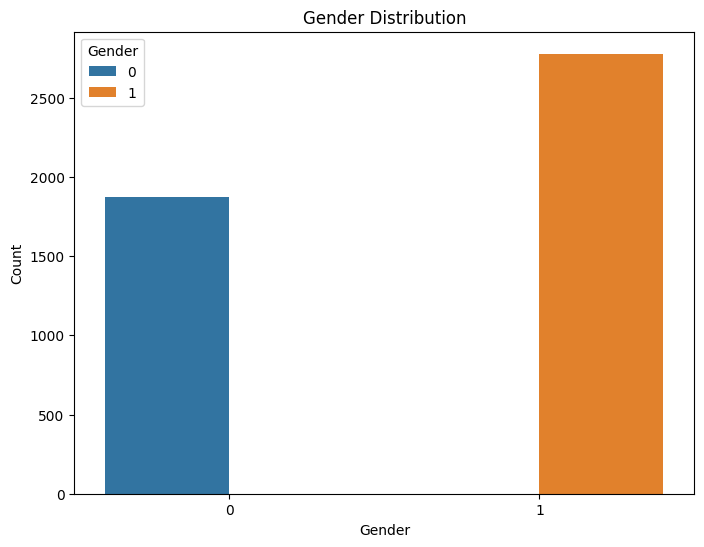

In [12]:
plt.figure(figsize=(8,6))

sns.countplot(data=employee_data, x='Gender', hue = 'Gender')

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

남성(1)이 여성(0) 보다 조금 더 많음

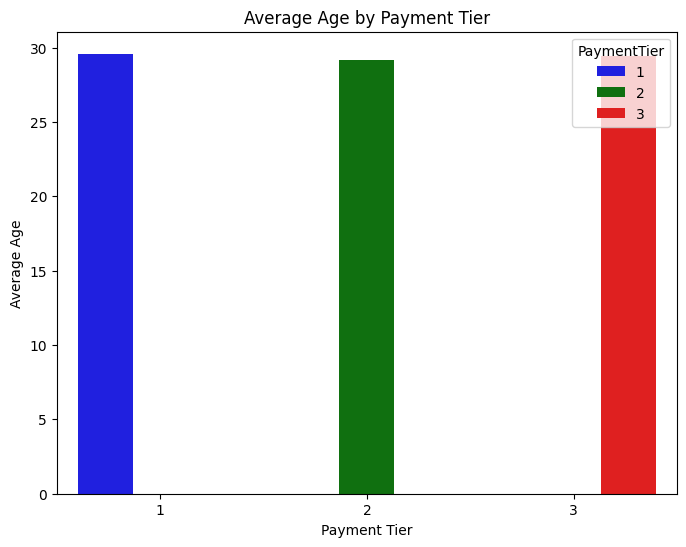

In [13]:
plt.figure(figsize=(8,6))

palette = {1: 'blue', 2: 'green', 3: 'red'}
sns.barplot(data=employee_data, x='PaymentTier', y='Age', hue='PaymentTier', palette=palette, errorbar=None)

plt.title("Average Age by Payment Tier")
plt.xlabel("Payment Tier")
plt.ylabel("Average Age")

plt.show()

나이와 급여는 큰 상관관계가 없음

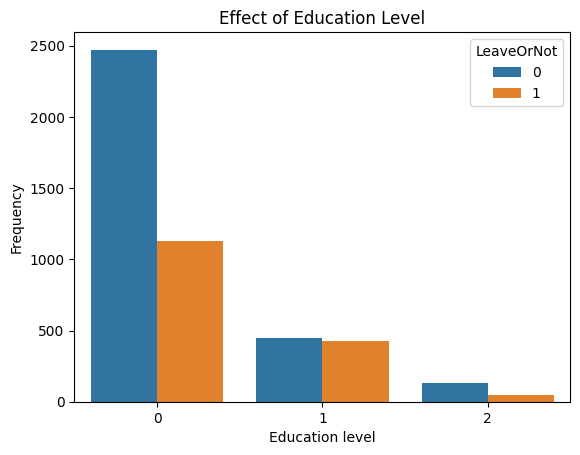

In [14]:
sns.countplot(x="Education", hue="LeaveOrNot", data=employee_data)
plt.xlabel('Education level')
plt.ylabel('Frequency')
plt.title('Effect of Education Level')
plt.show()

학력(학사, 석사, 박사)과 퇴사 비교

-> 석사의 퇴사 비율이 높음

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

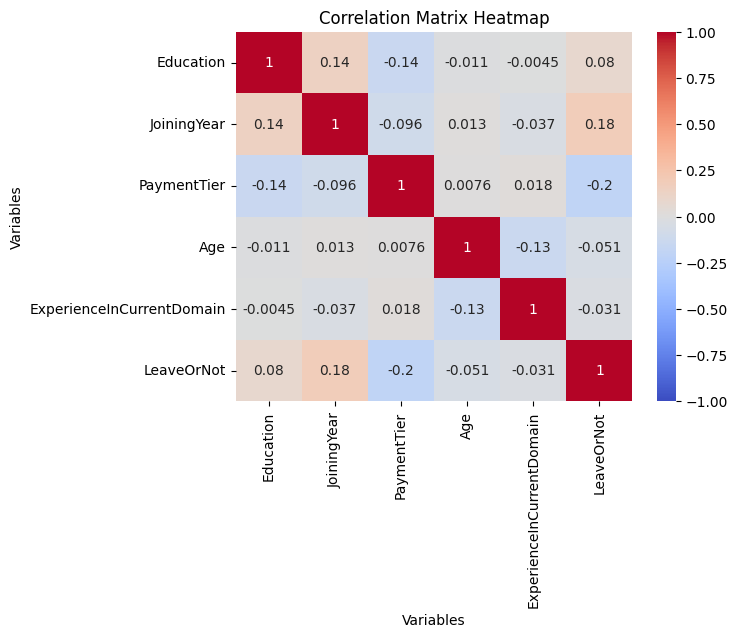

In [15]:
data_corr = employee_data.drop(["City","Gender","EverBenched"],axis=1).corr()
sns.heatmap(data_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Correlation Matrix Heatmap')

입사년도와 퇴사와의 상관관계가 0.18로 제일 높음

-> 즉 최근에 입사한, 근속년수가 짧은 직원의 퇴사률이 높음

# 1.5 Data spliting

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# 80% taain data, 20% test data로 나눔
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
X_train.shape, y_train.shape , X_test.shape , y_test.shape

((3722, 8), (3722,), (931, 8), (931,))

# 2. Model Construction

# 2.1 Set Models

In [19]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(fit_intercept = True, solver='liblinear',random_state=0)

In [20]:
from sklearn.tree import DecisionTreeClassifier

#Construct the decision tree model
model_dt = DecisionTreeClassifier(criterion='gini',splitter='best',
                                             max_depth = 10, random_state = 0)

In [21]:
models = [model_lr, model_dt]

# 2.2 Model Training

In [22]:
from sklearn.metrics import accuracy_score
for model in models:
    model.fit(X_train, y_train)
    pre = model.predict(X_train)

    acc = accuracy_score(pre, y_train)

    print(model, acc)

LogisticRegression(random_state=0, solver='liblinear') 0.7114454594304137
DecisionTreeClassifier(max_depth=10, random_state=0) 0.8855454056958625


In [23]:
#Choose the model
model = model_dt

# 3. Performance

In [24]:
from sklearn.metrics import accuracy_score
pre = model.predict(X_test)
acc = accuracy_score(y_test, pre)
print("Test Accuracy:", acc)

Test Accuracy: 0.8603651987110634


## 인공신경망 모형을 통한 성능 개선

7가지 방법
1. 데이터 전처리

    - MinMaxScaler  :  [0,1]사이의 데이터로 변환
    - StandardScaler : 평균 0이고, 분산이 1인 데이터로 변환
    - RobustScaler :  데이터의 중위수(median)를 중심으로 정규화, 데이터의 이상치에 민감하지 않음

2. 신경망 모형

   - 은닉층의 갯수 (1개, 2개)
   - 은닉층의 크기 hidden_size (10 ~ 50)

3. 활성화 함수(Activation Function)
   
   - 계단 함수 (Step Function)
   - 스그모이드(Sigmoid)
   - ReLu
   - Softplus

4. 최적화 알고리즘
   - SGD(Stochastic Gradient Descent)
   - Momentum
   - AdaGrad
   - Adam (Adagrad + Momentum)

5. 손실함수 (Loss Function)

   - MSELoss()
   - CrossEntropyLoss() 교차엔트로피 오차
  
6. Batch Normalization 적용

   - Activation으로 전달되는 값이 표준 정규분포를 갖도록 강제

7. Dropout 적용
   - 뉴런을 임의로 삭제하면서 학습


  

In [25]:
X = employee_data.drop('LeaveOrNot',axis = 1)
y = employee_data['LeaveOrNot']

In [26]:
# y를 2차원 텐서로 변환
y = y.values.reshape(-1, 1)

In [27]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
# 데이터 정규화
# scaler = MinMaxScaler()   # 데이터의 최소값을 0으로, 최대값을 1로 변환
# scaler = StandardScaler() # 데이터의 평균을 0으로, 표준편차를 1로 변환
scaler = RobustScaler()     # 데이터의 중위수(median)를 중심으로 정규화
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(np.array(y_train), dtype=torch.long)
y_test = torch.tensor(np.array(y_test), dtype=torch.long)

# 데이터로더 정의
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)

In [40]:
# 신경망 모델 정의
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        #self.bn1 = nn.BatchNorm1d(input_size)
        self.fc1 = nn.Linear(input_size, hidden_size)
        #self.dropout1 = nn.Dropout(0.2)
        #self.bn2 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        #self.dropout2 = nn.Dropout(0.2)
        #self.bn3 = nn.BatchNorm1d(hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        #x = self.bn1(x)
        x = torch.relu(self.fc1(x))
        #x = torch.nn.functional.softplus(self.fc1(x))
        #x = torch.threshold(self.fc1(x), thresh=0)
        #x = self.dropout1(x)
        #x = self.bn2(x)
        x = torch.sigmoid(self.fc2(x))
        #x = torch.nn.functional.softplus(self.fc2(x))
        #x = self.dropout2(x)
        #x = self.bn3(x)
        x = torch.relu(self.fc3(x))
        #x = torch.nn.functional.softplus(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

input_size = X.shape[1]
hidden_size = 30  # 10 ~ 50
output_size = 1
model = NeuralNetwork(input_size, hidden_size, output_size)

# 손실 함수 정의
# criterion = nn.MSELoss()
# criterion = nn.CrossEntropyLoss()
criterion = nn.SmoothL1Loss()    # L1Loss() 함수와 MSELoss() 함수의 중간 정도의 성능을 보이는 손실 함수
# criterion = nn.HuberLoss()     # L1Loss() 함수와 MSELoss() 함수의 특성을 모두 갖는 손실 함수


# 옵티마이저 정의
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)


# 모델 훈련(Neural network model)
for epoch in range(100):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.float())
        loss.backward()
        optimizer.step()

# X_test를 텐서로 변환하여 모델에 전달
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# 테스트 데이터로 예측(Neural network model)
with torch.no_grad():
    outputs_test = model(X_test_tensor)
    test_loss = criterion(outputs_test, y_test.float())
    predicted_test = (outputs_test > 0.5).float()
    test_accuracy = accuracy_score(y_test, predicted_test)
    print("\nTest Accuracy:", test_accuracy)


Test Accuracy: 0.874328678839957


<ipython-input-40-7974932afb43>:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)


## 최종 결과 88.1%

데이터 전처리 : RobustScaler

손실함수 : SmoothL1Loss

hidden_size : 30

엑티베이션 함수 : 4단 relu sig relu sig

옵티마이져 : adam

(3의 7승 = 2187)

## 데이터 전처리

scaler = MinMaxScaler()... 86%

scaler = StandardScaler()... 86%

scaler = RobustScaler()... 87%로 개선

## NeuralNetwork 신경망 모델 정의

은닉층을 2개로 확장... 86%

## hidden_size 사이즈 변경

hidden_size = 10   ...  86%

hidden_size = 20   ...  87%

hidden_size = 30   ...  87.8%

hidden_size = 40   ...  86.1%

hidden_size = 50   ...  86.1%

## 활성화 함수 변경

relu, softplus, relu, sigmoid 87.1%

softplus, softplus, softplus, sigmoid 86.2%

relu, sigmoid, relu, sigmoid 87.1%

### 손실함수 변경

criterion = nn.MSELoss()    ... 86.4%

criterion = nn.CrossEntropyLoss()  ... 65.5%

criterion = nn.SmoothL1Loss()  ... 87.3%

criterion = nn.HuberLoss() ... 86.3%

### 옵티마이저 변경

optimizer = torch.optim.Adam  ... 87.2%

optimizer = torch.optim.SGD  ... 65.5%

optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)   ... 65.5%

optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)  ... 85.5%

### Batch Normalization 및 Drpo 추가

BatchNorm1d 추가 ... 87.5%

Drop 추가 ... 84.9%

BatchNorm1d 및 DROP 추가 83%
